# assign color to teams

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans 

img_pth = "/home/arvind/Python/Fooball-CV-analysis/videos/output/cropped.jpg"

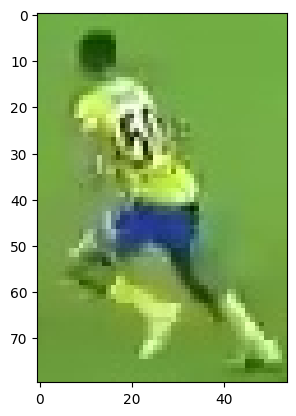

In [5]:
frame = cv2.imread(img_pth)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()

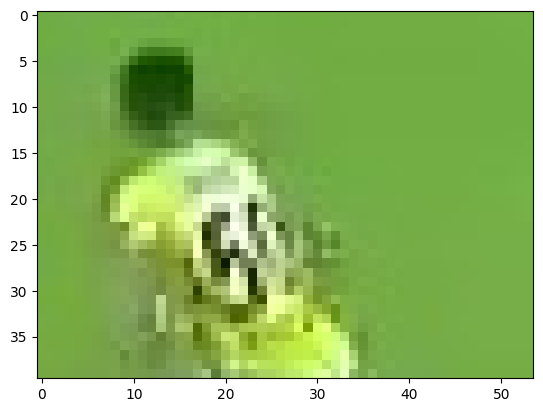

In [9]:
#take the cropped image
cropped = frame[:frame.shape[0]//2,:]
plt.imshow(cropped)
plt.show()

In [14]:
#now cluster the image into 2 clusters

#reshape to 2d
twod_img = cropped.reshape(-1, 3)


#cluster
clusters = KMeans(n_clusters=2, random_state=0).fit(twod_img)
clusters.labels_
labels = clusters.labels_.reshape(cropped.shape[0],cropped.shape[1])


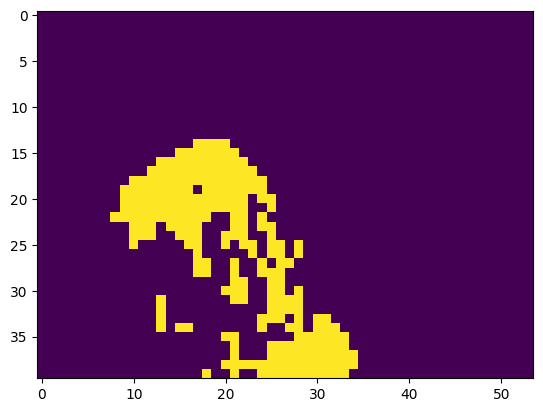

(40, 54)

In [20]:
plt.imshow(labels)
plt.show()
labels.shape

In [48]:
#corner pixels
corner_cluster = [labels[0,0],labels[0,-1],labels[cropped.shape[1]//2,21],labels[-1,0], labels[-1,-1]]
print(corner_cluster.count)
print(set(corner_cluster))

bg_cluster = max(set(corner_cluster),key=corner_cluster.count)
bg_cluster

<built-in method count of list object at 0x7133d89e2a00>
{0, 1}


0

In [49]:
player_cluster = 1-bg_cluster
player_cluster

1

In [51]:
#to get the avg color
cluster_center = clusters.cluster_centers_[player_cluster]
cluster_center

array([201.70682731, 231.57429719, 137.18473896])